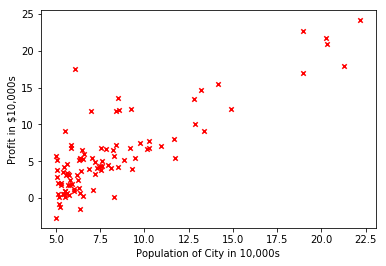

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Carregando os dados
dados = pd.read_csv('ex1data1.txt', names = ['populacao', 'lucro'])
#print (dados)

#gráfico de dispersão (scatter plot) dos dados
plt.clf()
dados.plot.scatter(x='populacao', y='lucro',color='Red',marker='x');
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.figure(figsize=(30,35))
plt.show()

In [2]:
"""
Atribuindo valores das variáveis para a função de custo
"""
## Separa as colunas 'populacao' e 'lucro' em X e y
X_df = pd.DataFrame(dados.populacao)
y_df = pd.DataFrame(dados.lucro)

## Numero de observacoes dos dados
m = len(y_df)

In [3]:
"""
Declarações de parâmetros
alpha: taxa de aprendizado
it:iterações (quantas vezes realiza atualização)
"""

it = 1500
alpha = 0.01

In [4]:
"""
As duas operações a seguir são para, primeiro, transformar a estrutura dos dados em uma matriz
para simplificar as operações e, em seguida, calcular a função de custo. 
(np.dot é usado para multiplicação de matrizes)
"""

## Adiciona uma coluna só com "1". Isso vai ser a segunda coluna quando for feita a interceptação com X.
X_df['intercept'] = 1
#print (X_df) #para conferir


In [5]:

## Transforma em vetores do Numpy para facilitar operações com matrizes
## Inicia com theta em 0, 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

In [6]:
def computarCusto(X, y, theta):

    """
    computarCusto(X, y, theta) calcula o custo usando theta como 
    parametro da regressão linear para ajustar os pontos em X e y
    m -- quantidade de itens do conjunto de treinamento
    J -- função de custo
    theta -- Gradiente Descendente
    """
    ## quantidade de itens do conjunto de treinamento
    m = len(y)

    ## Calcula o custo com os parãmetros fornecidos
    J = np.sum((X.dot(theta)-y)**2)/2/m

    return J

In [7]:
"""
"Após implementar essa função, você pode verificar a cor-
retude executando com todos os parâmetros iguais a zero. Nessa situação, sua
função deve gerar um valor igual a 32,07."
"""

#computarCusto(X, y, theta)
#print (computarCusto(X, y, theta))
#print(theta)
result = (computarCusto(X, y, theta))
#print ("Com todos os parâmetros iguais a %s, a função gera um valor igual a %f." % (theta,result))
print ("Com todos os parâmetros iguais a zero, a função gera um valor igual a %.2f." % result)

Com todos os parâmetros iguais a zero, a função gera um valor igual a 32.07.


In [8]:
def gduni(X, y, theta, alpha, it):
    """
    gduni Executa o algoritmo Gradiente Descendente para ajustar theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) atualiza o valor de theta  
    em passos, definido pelo número de iterações (it), com taxa de aprendizado alpha
    
    
    
    """
    custo_temp = [0] * it
    
    for iteration in range(it):
        hipotese = X.dot(theta)
        perda = hipotese-y
        gradiente = X.T.dot(perda)/m
        theta = theta - alpha*gradiente
        custo = computarCusto(X, y, theta)
        custo_temp[iteration] = custo

    return theta, custo_temp

In [9]:
(t, c) = gduni(X,y,theta,0.01, 3000)
ajuste_x = np.linspace(0, 25, 20)
ajuste_y = [t[1] + t[0]*xx for xx in ajuste_x]

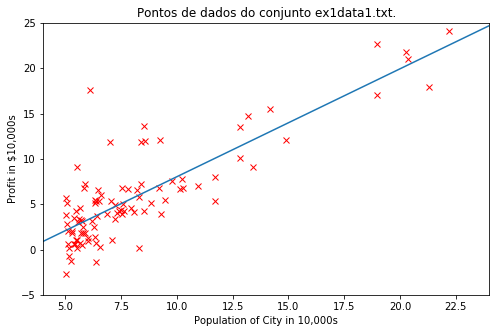

In [10]:
plt.clf()
plt.figure(figsize=(8,5))
plt.plot(X_df.populacao, y_df, '.',color='Red',marker='x')
plt.plot(ajuste_x, ajuste_y, '-')
plt.axis([4,24,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Pontos de dados do conjunto ex1data1.txt.')
plt.show()

In [11]:
"""
"Usar o modelo de regressão linear produzido pelo seu código para predizer o lucro em regiões com
populações de 35.000 e 70.000 habitantes. 
"""

print ("Lucro em regiões com populações de 35.000 habitantes = $ %.2f" % (10000.0*(np.array([3.5, 1]).dot(t))))
print ("Lucro em regiões com populações de 70.000 habitantes = $ %.2f" % (10000.0*(np.array([7, 1]).dot(t))))

Lucro em regiões com populações de 35.000 habitantes = $ 2913.33
Lucro em regiões com populações de 70.000 habitantes = $ 44607.16
